In [1]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
#Loading the dataset
df = pd.read_csv('D:\\SLIIT\\3rd year 2nd sem\\Machine Learning amd Optimization Methods\\Coding\\glass.csv')
df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [3]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [4]:
df.shape

(214, 10)

In [5]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [6]:
df.duplicated().sum()

1

In [7]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
df.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [11]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [12]:
counts = df['Type'].value_counts()
counts

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

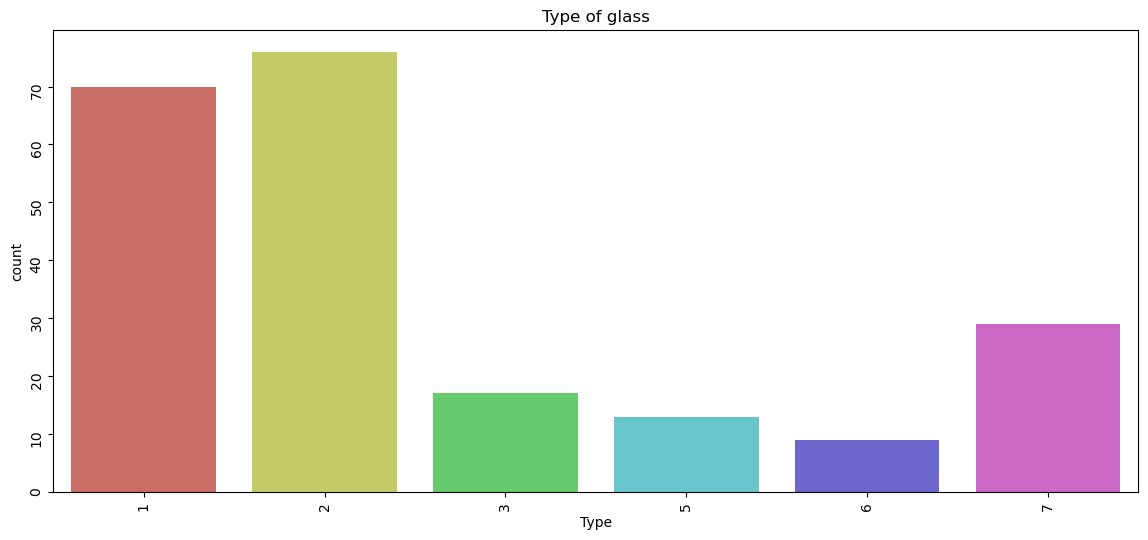

In [17]:
plt.figure(figsize = (14,6))
sns.countplot(x='Type',data=df, palette = 'hls')
plt.title('Type of glass')
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show()

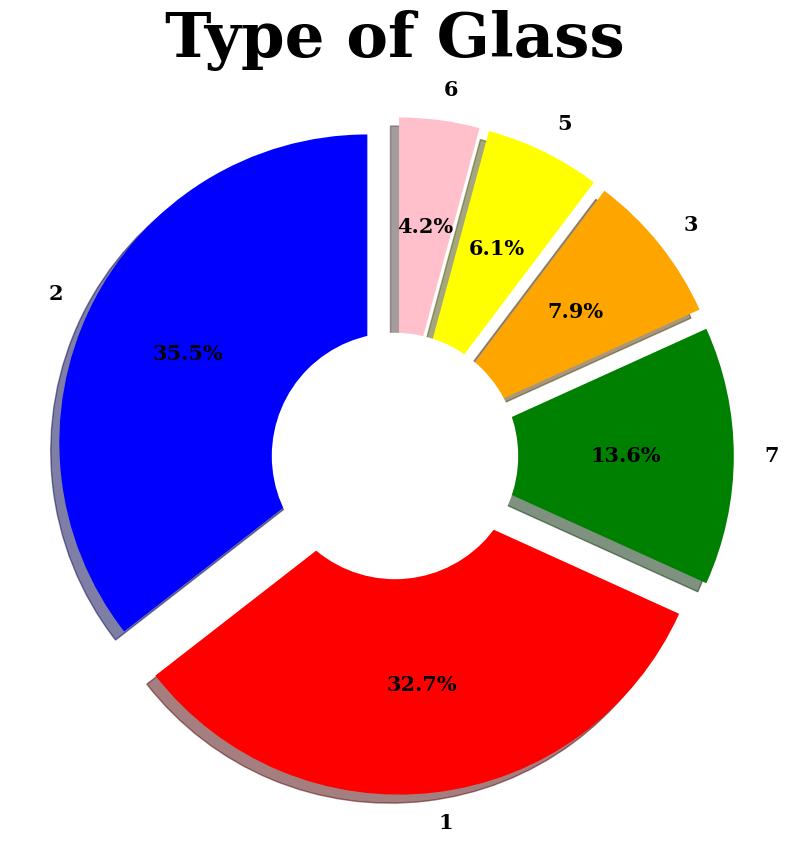

In [18]:
glass_data = df['Type'].value_counts()
explode = (0.1,0.1,0.1,0.1,0.1,0.1)
plt.figure(figsize=(14,10))
patches, texts, pcts = plt.pie(glass_data, labels=glass_data.index, colors=['blue','red','green','orange','yellow','pink'],
                              pctdistance=0.65,shadow=True,startangle=90,explode=explode,autopct='%1.1f%%',
                              textprops={'fontsize':15,
                                        'color':'black',
                                        'weight':'bold',
                                        'family':'serif'})
plt.setp(pcts,color='black')
hfont = {'fontname':'serif','weight':'bold'}
plt.title('Type of Glass',size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

* **pctdistance** argument sets the distance of the percentage values from the center of the pie chart. 


* The **autopct** argument sets the format for the percentage values. In this case, it's set to **1.1f%%** to show the **percentage with one decimal point**.


* The **setp()** is used to set the properties of the percentage labels that are generated by the **autopct** parameter in the plt.pie() function. Specifically, setp() is used to set the color of the percentage labels to black. The first argument of setp() is the object to which the properties should be set, in this case, the pcts variable that contains the percentage labels generated by plt.pie(). The second argument is the name of the property that should be set, in this case, 'color'. The third argument is the value to which the property should be set, in this case, 'black'.


* The ****hfont** parameter in the plt.title() function is used to pass a dictionary of font properties to the title method. Specifically, hfont is a dictionary that contains the fontname and weight properties, which are set to 'serif' and 'bold', respectively.


* The ****** in front of hfont is called the "unpacking operator" or "splat operator". It allows you to pass a dictionary as a set of keyword arguments to a function. In this case, it allows you to pass the dictionary hfont to the title method as a set of keyword arguments that correspond to the fontname and weight properties.By using the ** operator, you can avoid having to manually unpack the dictionary and pass the individual properties as separate arguments to the function.


* The **Circle()** is used to create a circular patch object in matplotlib. In this specific example, the Circle() function is used to create a white circle that is overlaid on top of the pie chart created earlier.


* The **fc parameter** is used to set the face color of the circle, which is set to white in this case. The fc parameter in Circle() function represents the face color of the circle. It is used to set the color of the inner part of the circle. In the given code, fc='white' is used to set the color of the inner part of the circle to white.


* **gcf()** stands for **"Get Current Figure"**. It is used to retrieve the reference to the current figure that is being modified or updated. In the given code, gcf() is used to get the reference to the current figure so that the centre_circle can be added to the plot using the **add_artist()** method of the Axes object that belongs to the current figure.


* **add_artist()** is used to add an artist to the axes object. In the given code, add_artist() is used to add the centre_circle object, which is a Circle object, to the current Axes object. This creates a circle with the specified parameters in the center of the pie chart.

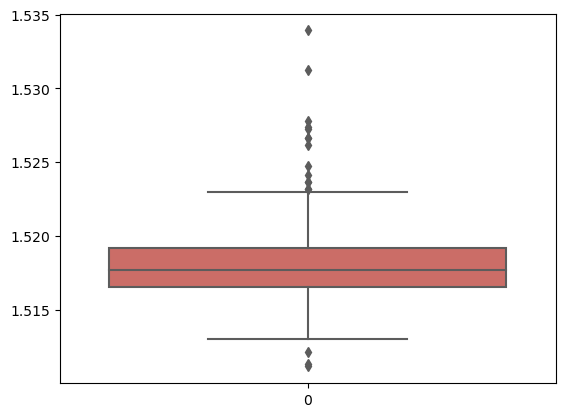

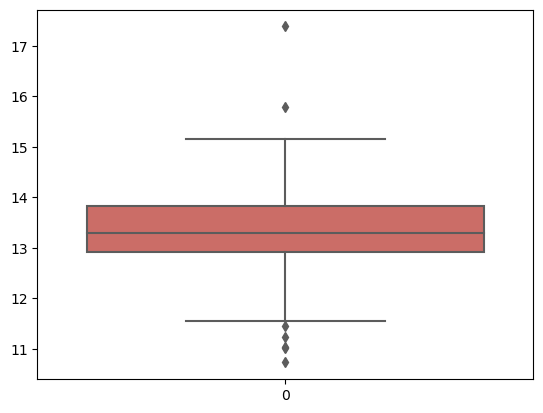

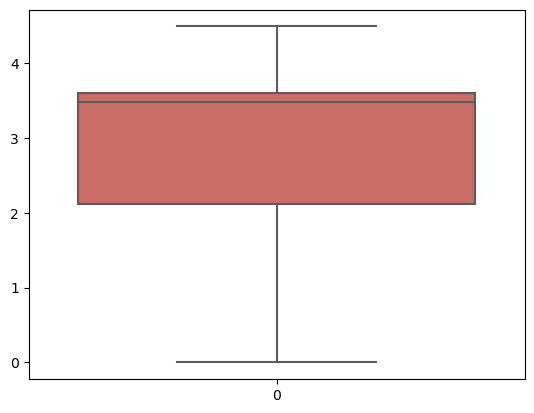

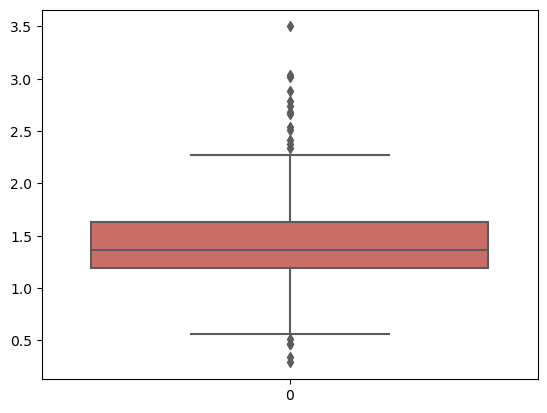

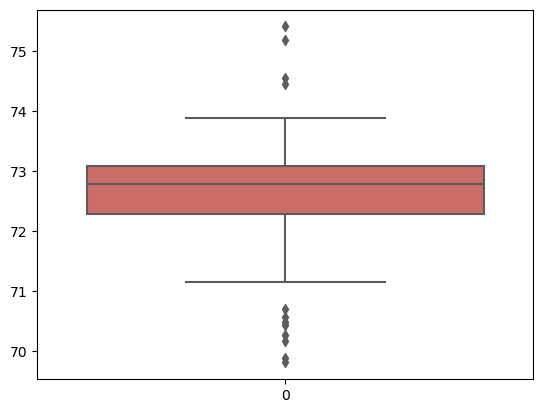

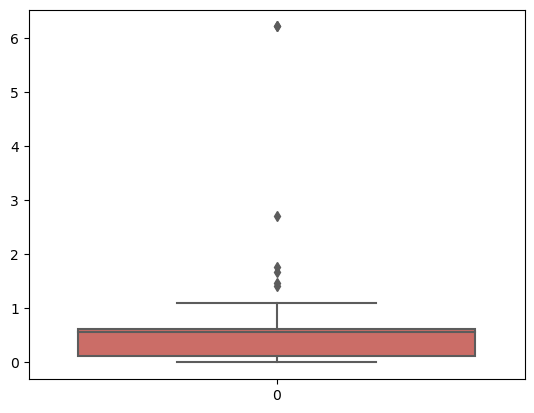

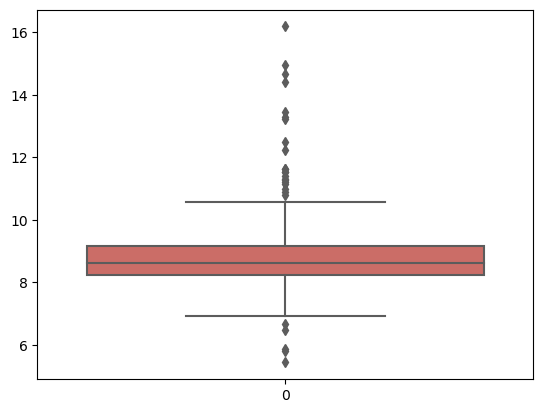

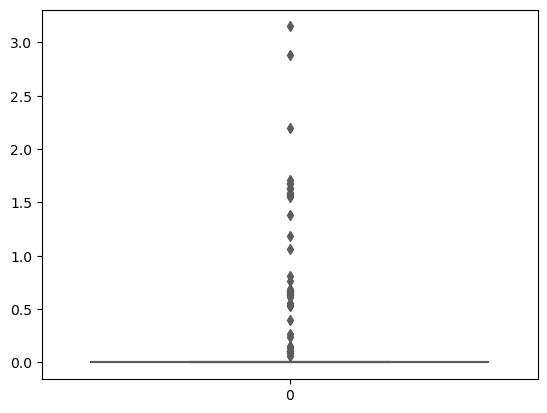

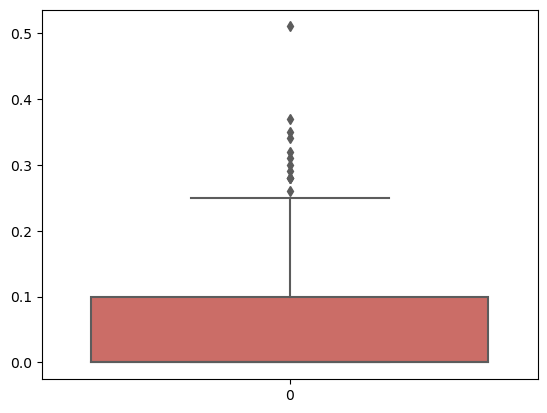

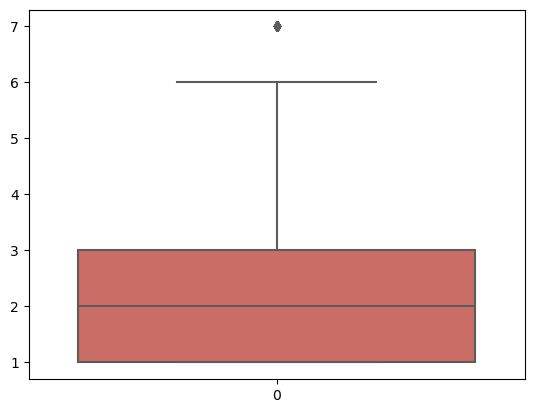

In [19]:
for i in df.columns:
    sns.boxplot(df[i],palette='hls')
    plt.show()

In [20]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [22]:
corr_matrix = df.corr().abs()

#Select the upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

#Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

#Drop features
df.drop(to_drop,axis=1,inplace=True)

* Selects the upper triangle of the correlation matrix using the **np.triu()**. This is done to avoid duplicates because the correlation matrix is symmetric across the diagonal. The k parameter specifies the diagonal offset, i.e., k=1 means to exclude the diagonal and everything below it.

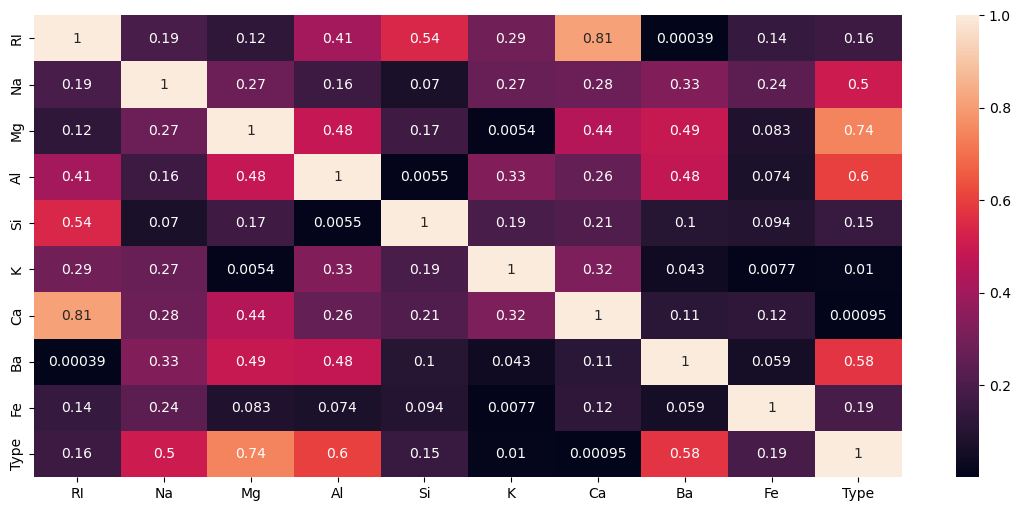

In [23]:
plt.figure(figsize=(14,6))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [24]:
x = df.drop('Type',axis=1)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [25]:
y = df['Type']
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [26]:
#Splitting the dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)

In [27]:
scaler = preprocessing.RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

* **sklearn.preprocessing.RobustScaler()** is a scaler in scikit-learn that scales features by removing the median and scaling the data according to the interquartile range (IQR). It is useful for dealing with outliers because it is robust to them.


* More specifically, it scales each feature by subtracting the median and then dividing by the IQR, which is the difference between the 75th percentile and the 25th percentile of the feature's values. The scaling equation is:


* **(x - median) / IQR** where x is the feature value.


* This scaling method is less affected by outliers than standard scaling, which scales data by subtracting the mean and dividing by the standard deviation. If the data contains outliers, they can have a large impact on the mean and standard deviation, resulting in poor scaling.

In [28]:
#Creating the DecisionTreeClassifier object
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
y_pred_dt = dt.predict(x_test)

In [31]:
cm_dt = confusion_matrix(y_test,y_pred_dt)

In [32]:
cm_dt

array([[ 7, 14,  1,  0,  0,  1],
       [ 4,  5,  2,  2,  1,  2],
       [ 1,  6,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  6]], dtype=int64)

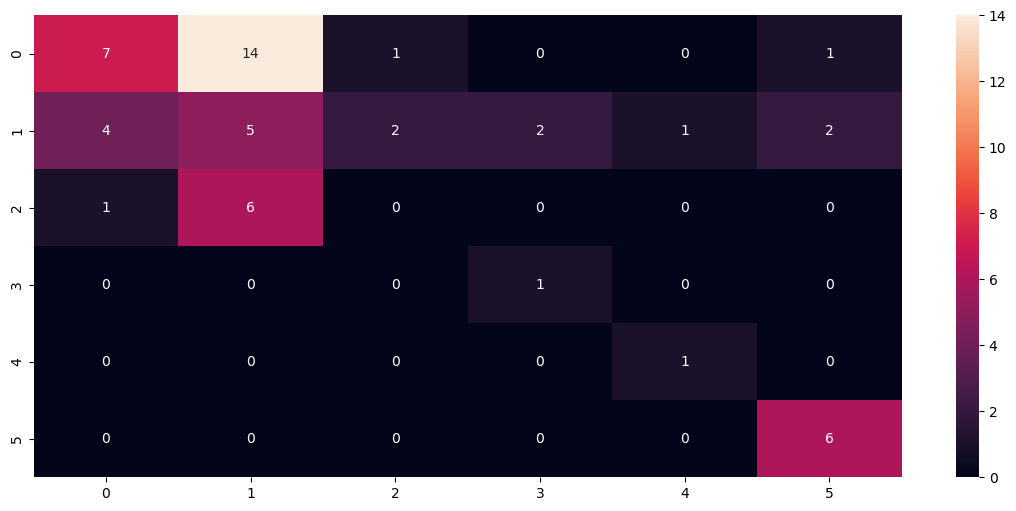

In [33]:
plt.figure(figsize=(14,6))
sns.heatmap(cm_dt,annot=True)
plt.show()

In [34]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           1       0.58      0.30      0.40        23
           2       0.20      0.31      0.24        16
           3       0.00      0.00      0.00         7
           5       0.33      1.00      0.50         1
           6       0.50      1.00      0.67         1
           7       0.67      1.00      0.80         6

    accuracy                           0.37        54
   macro avg       0.38      0.60      0.44        54
weighted avg       0.40      0.37      0.35        54



In [35]:
#Creating the RandomForestClassifier object
rf = RandomForestClassifier(n_estimators=10,criterion='entropy')
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [36]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([2, 7, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 7,
       2, 1, 2, 3, 2, 2, 2, 1, 5, 6, 1, 1, 1, 2, 2, 2, 2, 1, 2, 7, 7, 1,
       7, 1, 1, 1, 2, 7, 2, 2, 5, 2], dtype=int64)

In [38]:
cm_rf = confusion_matrix(y_test,y_pred_rf)

In [39]:
cm_rf

array([[18,  4,  1,  0,  0,  0],
       [ 2, 13,  0,  1,  0,  0],
       [ 3,  4,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  6]], dtype=int64)

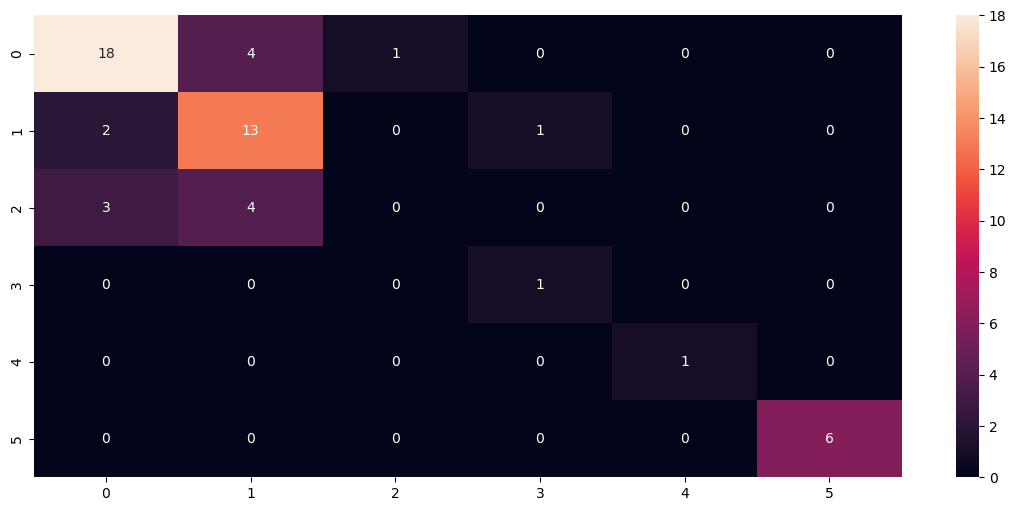

In [40]:
plt.figure(figsize=(14,6))
sns.heatmap(cm_rf,annot=True)
plt.show()

In [41]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           1       0.78      0.78      0.78        23
           2       0.62      0.81      0.70        16
           3       0.00      0.00      0.00         7
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         6

    accuracy                           0.72        54
   macro avg       0.65      0.77      0.69        54
weighted avg       0.66      0.72      0.68        54



In [42]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(x_train,y_train)

GradientBoostingClassifier()

In [43]:
y_pred_gb = gradient_booster.predict(x_test)
y_pred_gb

array([2, 7, 2, 2, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 7,
       2, 1, 1, 3, 2, 1, 1, 1, 5, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 7, 7, 1,
       7, 1, 1, 1, 2, 7, 2, 1, 2, 1], dtype=int64)

In [44]:
cm_gb = confusion_matrix(y_test,y_pred_gb)
cm_gb

array([[18,  4,  1,  0,  0,  0],
       [ 4, 12,  0,  0,  0,  0],
       [ 3,  3,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6]], dtype=int64)

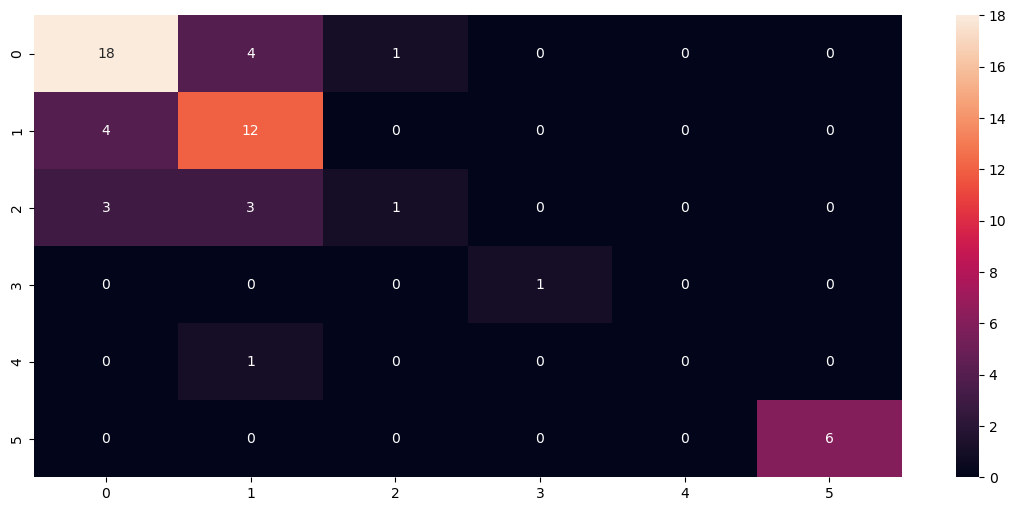

In [45]:
plt.figure(figsize = (14,6))
sns.heatmap(cm_gb, annot = True)
plt.show()

In [47]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           1       0.72      0.78      0.75        23
           2       0.60      0.75      0.67        16
           3       0.50      0.14      0.22         7
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         6

    accuracy                           0.70        54
   macro avg       0.64      0.61      0.61        54
weighted avg       0.68      0.70      0.68        54

